Saving Restaurant_revenue.xlsx to Restaurant_revenue (21).xlsx
Dataset Overview:
   Marketing_Spend  Monthly_Revenue
0        12.663793       350.912040
1         4.577892       221.319091
2         4.652911       326.529763
3         4.416053       348.190573
4         3.475052       185.009121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing_Spend  1000 non-null   float64
 1   Monthly_Revenue  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
Missing Values:
 Marketing_Spend    0
Monthly_Revenue    0
dtype: int64


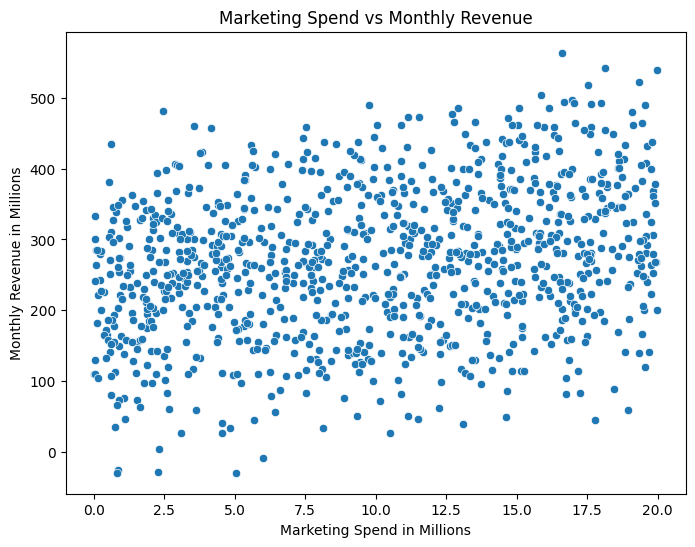

Theta (parameters):
[[268.7241723 ]
 [ 28.05393907]]
Adjusted Theta (Original Scale):
Theta_0 (y-intercept): 220.90667978010134
Theta_1 (slope): 28.05393907202799


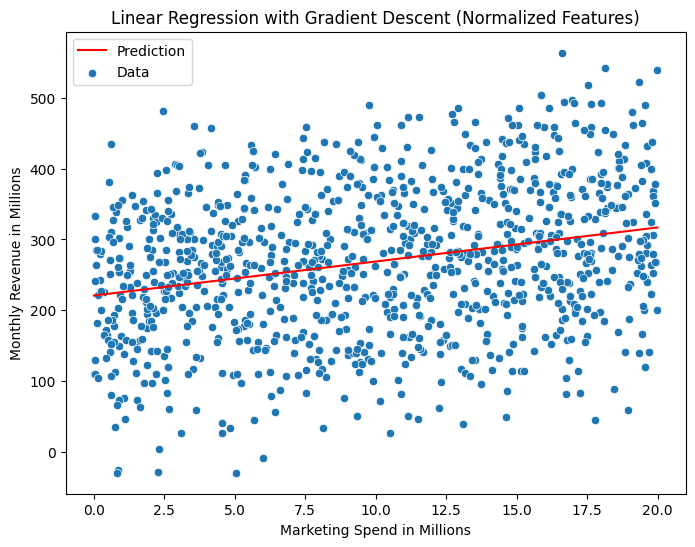

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
filename = list(uploaded.keys())[0]
data = pd.read_excel(filename)

# Display basic info
print("Dataset Overview:")
print(data.head())
print(data.info())

# Data Cleaning and Preparation
# Checking for missing values
print("Missing Values:\n", data.isnull().sum())

# Assuming 'Marketing_Spend' and 'Revenue' are columns in the dataset
data = data.dropna()  # Remove rows with missing values if necessary

# Define features and target variable
X = data['Marketing_Spend'].values.reshape(-1, 1)  # Feature column reshaped to 2D
y = data['Monthly_Revenue'].values.reshape(-1, 1)  # Target column

# Plot the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing_Spend', y='Monthly_Revenue', data=data)
plt.xlabel('Marketing Spend in Millions')
plt.ylabel('Monthly Revenue in Millions')
plt.title('Marketing Spend vs Monthly Revenue')
plt.show()

# Normalize the features (Marketing Spend)
X_mean = X.mean()
X_std = X.std()
X_normalized = (X - X_mean) / X_std

# Recreate X_b with normalized features
X_b = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Reinitialize parameters and hyperparameters
theta = np.random.randn(2, 1)
learning_rate = 0.1  # Reduced learning rate
n_iterations = 1000

# Gradient Descent with normalized features
for iteration in range(n_iterations):
    gradients = 2 / X_normalized.shape[0] * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Results after normalization
print("Theta (parameters):")
print(theta)

# Adjusting theta_0 to the original scale
adjusted_theta_0 = theta[0, 0] - (theta[1, 0] * X_mean / X_std)

# Adjusted parameters
print("Adjusted Theta (Original Scale):")
print(f"Theta_0 (y-intercept): {adjusted_theta_0}")
print(f"Theta_1 (slope): {theta[1, 0]}")

# Plot the fitted line
X_new_normalized = (np.array([[X.min()], [X.max()]]) - X_mean) / X_std
X_new_b = np.c_[np.ones((2, 1)), X_new_normalized]
y_predict = X_new_b.dot(theta)

# Visualization of Gradient Descent Line
plt.figure(figsize=(8, 6))
plt.plot([X.min(), X.max()], y_predict, 'r-', label='Prediction')
sns.scatterplot(x='Marketing_Spend', y='Monthly_Revenue', data=data, label="Data")
plt.xlabel('Marketing Spend in Millions')
plt.ylabel('Monthly Revenue in Millions')
plt.title('Linear Regression with Gradient Descent (Normalized Features)')
plt.legend()
plt.show()

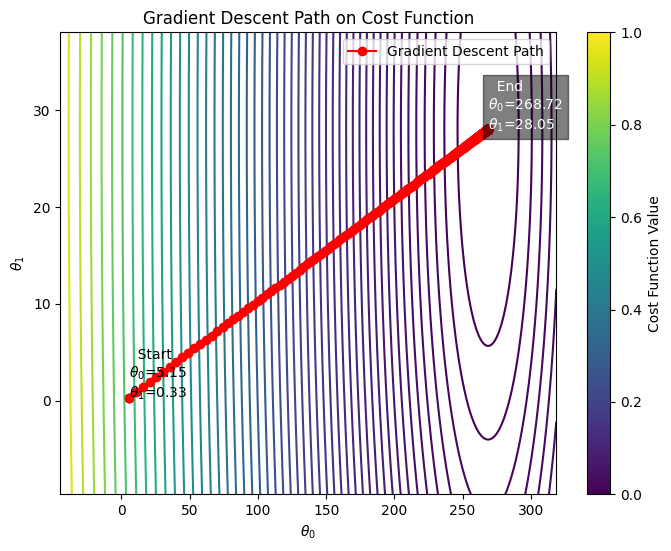

In [ ]:
# Plot the contour of the cost function
plt.figure(figsize=(8, 6))
contour_levels = np.logspace(np.log10(cost_vals.min()), np.log10(cost_vals.max()), 50)
plt.contour(T0, T1, cost_vals, levels=contour_levels, cmap='viridis')

# Plot the gradient descent path
plt.plot(theta_history[:, 0], theta_history[:, 1], 'r-o', label='Gradient Descent Path')  # Path

# Start point (black)
plt.scatter(theta_history[0, 0], theta_history[0, 1], color='black')  # Start point
plt.text(theta_history[0, 0], theta_history[0, 1],
         f'  Start\n$\\theta_0$={theta_history[0, 0]:.2f}\n$\\theta_1$={theta_history[0, 1]:.2f}',
         color='black', fontsize=10)

# End point (white)
plt.scatter(theta_history[-1, 0], theta_history[-1, 1], color='white')  # End point
plt.text(theta_history[-1, 0], theta_history[-1, 1],
         f'  End\n$\\theta_0$={theta_history[-1, 0]:.2f}\n$\\theta_1$={theta_history[-1, 1]:.2f}',
         color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.5))

# Plot details
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Gradient Descent Path on Cost Function')
plt.legend()
plt.colorbar(label='Cost Function Value')
plt.show()
